## Regression analysis of the non-dimensional coefficients of thrust and power coefficients, $C_t$ and $C_p$ for multirotor (MR) propellers

## 1: Filtering static propellers data

From the file: *APC_STATIC-data-all-props.csv* we find all static data provided by APC producer for all the propellers:

In [1]:
import pandas as pd

# Read the .csv file with bearing data
path='./'
df = pd.read_csv(path+'APC_STATIC-data-all-props.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D
0,1,1,NaN,1000,10.5,4.5,2,0.03,0.01,0.02,0.03,0.08,0.06,0.1335,7.457,0.43,60.180222,10500.0
1,2,1,NaN,2000,10.5,4.5,2,0.13,0.01,0.08,0.03,0.08,0.06,0.5785,7.457,0.43,60.180222,21000.0
2,3,1,NaN,3000,10.5,4.5,2,0.29,0.01,0.17,0.03,0.08,0.06,1.2905,7.457,0.43,60.180222,31500.0
3,4,1,NaN,4000,10.5,4.5,2,0.52,0.02,0.30,0.03,0.08,0.06,2.3140,14.914,0.43,60.180222,42000.0
4,5,1,NaN,5000,10.5,4.5,2,0.81,0.04,0.47,0.03,0.08,0.06,3.6045,29.828,0.43,60.180222,52500.0


Experimentally, it can be shown forward on that our data can be quite well fitted if we filter them regarding:
-  **Type 'MR' (Multi-Rotor)**    
-  **Maximum RPM=105,000/prop diameter (inches)**
-  **Efficiency > 60**: 

Under these three conditions, the final $c_p$ (power coefficient) and $c_t$ (thrust coefficient) will follow a good regression with the rotational speed and diameter.

In [2]:
df['MR']=False
for i in range(len(df['TYPE'])):
    if df.loc[i,'TYPE']=='MR' and df.loc[i,'N.D']<105000 and df.loc[i,'EFF']>60:
        df.loc[i,'MR']=True

In [3]:
df_filter=df[df['MR']]
df_filter

,LINE,COMP,TYPE,RPM,DIAMETER(IN),PITCH(IN),BLADE(nb),THRUST(LBF),POWER(HP),TORQUE(IN.LBF),Cp,Ct,AREA(m^2),THRUST(N),POWER(W),ANGLE,EFF,N.D,MR
135,147,8,MR,2000,10.0,4.5,2,0.14,0.01,0.09,0.04,0.11,0.05,0.6230,7.457,0.45,72.772802,20000.0,True
146,148,8,MR,3000,10.0,4.5,2,0.32,0.01,0.20,0.04,0.11,0.05,1.4240,7.457,0.45,72.772802,30000.0,True
147,149,8,MR,4000,10.0,4.5,2,0.57,0.02,0.36,0.04,0.11,0.05,2.5365,14.914,0.45,72.772802,40000.0,True
148,150,8,MR,5000,10.0,4.5,2,0.90,0.04,0.56,0.04,0.11,0.05,4.0050,29.828,0.45,72.772802,50000.0,True
149,151,8,MR,6000,10.0,4.5,2,1.29,0.08,0.79,0.04,0.11,0.05,5.7405,59.656,0.45,72.772802,60000.0,True
150,152,8,MR,7000,10.0,4.5,2,1.76,0.12,1.06,0.04,0.11,0.05,7.8320,89.484,0.45,72.772802,70000.0,True
151,153,8,MR,8000,10.0,4.5,2,2.31,0.17,1.37,0.04,0.11,0.05,10.2795,126.769,0.45,72.772802,80000.0,True
153,155,8,MR,10000,10.0,4.5,2,3.67,0.39,2.46,0.05,0.12,0.05,16.3315,290.823,0.45,66.334877,100000.0,True
200,210,11,MR,2000,10.0,5.5,2,0.15,0.01,0.10,0.05,0.12,0.05,0.6675,7.457,0.55,66.334877,20000.0,True
209,211,11,MR,3000,10.0,5.5,2,0.35,0.01,0.23,0.05,0.12,0.05,1.5575,7.457,0.55,66.334877,30000.0,True


We convert this panda table into a csv file:

In [4]:
df_filter.to_csv('APC_STATIC-data-RM-filtered.csv', sep=';')

If we fit power coefficient and thrust coefficient with beta for static results, we can see that there is a strong correlation for static data.

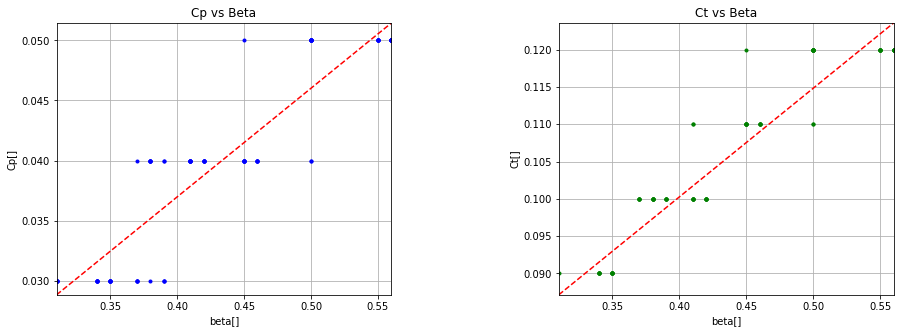

Interpolation model Cp: Cp=0.0905 * Beta+0.0008
R-Squared interpolation model is: 0.8370 
Interpolation model Ct: Ct=0.1458 * Beta+0.0419
R-Squared interpolation model is: 0.8995 


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
import pylab

from scipy.optimize import curve_fit

#define data domain
ANGLE=df_filter['ANGLE']

#define function domain
ang=np.linspace(ANGLE.min(), ANGLE.max(), num=100)

#Calculation of a function that fits the data
def func(T, a,b):
    return a * T+b
ydata = df_filter['Cp']
xdata = df_filter['ANGLE']


popt, pcov = curve_fit(func, xdata, ydata)
M_opt=popt 

#Calculating the value of R^2 
residuals = ydata- func(xdata, *popt)
ss_res = numpy.sum(residuals**2)
ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)
r2=r_squared = 1 - (ss_res / ss_tot)


#Interpolation model
Cp=M_opt[0]*ang+M_opt[1]

def f(T, c,d):
    return c * T+d
ydata2 = df_filter['Ct']
xdata2 = df_filter['ANGLE']

popt2, pcov2 = curve_fit(f, xdata2, ydata2)
M_opt2=popt2 

#Calculating the value of R^2 
residuals2 = ydata2- f(xdata2, *popt2)
ss_res2 = numpy.sum(residuals2**2)
ss_tot2 = numpy.sum((ydata2-numpy.mean(ydata2))**2)
r2_2=r_squared2 = 1 - (ss_res2 / ss_tot2)


#Interpolation model
Ct=M_opt2[0]*ang+M_opt2[1]

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,5))
#ax1.ylabel('Cp [-]')
#ax1.xlabel('beta [-]')

ax1 = plt.subplot(121)
ax1.plot(ang,Cp,'--r',label='Regression model')
ax1.plot(df_filter['ANGLE'],df_filter['Cp'],'.b',label='Data')
ax1.set_xlim([ANGLE.min(), ANGLE.max()])
ax1.set_ylim([Cp.min(), Cp.max()])
ax1.set_xlabel('beta[]')
ax1.set_ylabel('Cp[]')

ax1.grid()

ax1.set_title('Cp vs Beta')

ax2 = plt.subplot(122)
ax2.plot(ang,Ct,'--r',label='Regression model')
ax2.plot(df_filter['ANGLE'],df_filter['Ct'],'.g',label='Data')
ax2.grid()

ax2.set_title('Ct vs Beta')
ax2.set_xlim([ANGLE.min(), ANGLE.max()])
ax2.set_ylim([Ct.min(), Ct.max()])

ax2.set_xlabel('beta[]')
ax2.set_ylabel('Ct[]')

# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(wspace=0.5)

plt.show()

# Print
print("Interpolation model Cp: Cp=%.4f * Beta+%.4f"%(M_opt[0],M_opt[1]))
print("R-Squared interpolation model is: %.4f "%(r2))
print("Interpolation model Ct: Ct=%.4f * Beta+%.4f"%(M_opt2[0],M_opt2[1]))
print("R-Squared interpolation model is: %.4f "%(r2_2))



In the next point, a correlation of Cp and Ct for different speeds will be searched to relate the called *advance ratio* ($\mu$) with the $\beta$ angle (diameter/pitch):

## 2: Complete data for different speeds:

What we do next is to join in one *.txt* file the behaviour of these propellers in dependance of the rotational speed and advance ratio. For that reason, we need to download the corresponding performance data of the former filtered propellers under the producer's website [APC Propellers](https://www.apcprop.com/technical-information/performance-data/).

In [27]:
import os
filenames = ['optimal_props/PER3_10x45MR.dat','optimal_props/PER3_10x55MR.dat','optimal_props/PER3_11x45MR.dat','optimal_props/PER3_12x45MR.dat','optimal_props/PER3_12x55MR.dat','optimal_props/PER3_13x45MR.dat','optimal_props/PER3_13x55MR.dat','optimal_props/PER3_14x55MR.dat','optimal_props/PER3_15x55MR.dat','optimal_props/PER3_18x55MR.dat','optimal_props/PER3_16x55MR.dat','optimal_props/PER3_8x45MR.dat','optimal_props/PER3_9x45MR.dat']

with open('allfiles.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write('APC Propellers')            
            for line in infile:
                if not line.strip(): continue  # skip the empty line
                outfile.write(line)  # non-empty line. Write it to output


In [28]:
with open("allfiles.txt", "r") as fin:
    lines = fin.readlines()
    print(lines)

['APC Propellers         10x4.5MR                 (10x45MR.dat)                                12/19/14  diameter(in): 10 pitch(in): 4.5                        \n', '         ====== PERFORMANCE DATA (versus advance ratio and MPH) ======                                        \n', '         DEFINITIONS: *                                                                                        \n', '         J=V/nD (advance ratio)                                                                               \n', '         Ct=T/(rho * n**2 * D**4) (thrust coef.)                                                              \n', '         Cp=P/(rho * n**3 * D**5) (power coef.)                                                               \n', '         Pe=Ct*J/Cp (efficiency)                                                                              \n', '         V  (model speed in MPH)                                                                              \n', '         PROP RPM =  

## 2: Conversion of *.txt* file into *.csv* file

In [41]:
import csv
import re

with open('allfiles-corrected.txt', 'r') as infile, open('input.csv','w') as outfile: 
    for line in infile: 
        outfile.write(re.sub( ' +', ',', line ))


## 3: Addition of other coefficients in the *.csv* file

(To do modifications, please remove sign `#` from command `#data=list(reader)`, then compile and then include again the sign `#`)

In [4]:
import csv
import numpy as np

with open('input.csv','r') as csvinput:
    with open('output.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        reader = csv.reader(csvinput, dialect='excel', delimiter=',')
        row_count=0
        i=0 
        #data = list(csv.reader(csvinput))
        for row in reader:
            if row_count==len(data):
                break
            elif data[row_count][0]=='APC':
                writer.writerow(row)
                rpm_new=row_count+8
                end_new=rpm_new+33
                diameter=row_count
                pitch=row_count
            elif row_count>rpm_new+2 and row_count<end_new and (float(data[diameter][6])*float(data[rpm_new][4])<105000): #loop for body values, calculation of values
                J=data[row_count][2]
                mu_si=float(J)/3.14
                expmu=np.exp(-mu_si)
                D=data[diameter][6]
                p=data[pitch][8]
                beta=float(p)/float(D)
                expbeta=np.exp(beta)
                B=101000 #bulk modulus air [Pa]
                rho=1.25 #[kg/m3] density air
                bulk_coef=(rho*(rpm_new*2*np.pi)**2*(float(D)/2)**2)/B 
                bulk_coef_squared=bulk_coef**2
                cp_si=10/(8*np.pi**3)*abs(float(data[row_count][5]))
                ct_si=10/(8*np.pi**2)*abs(float(data[row_count][4]))
                EFF=100*float(ct_si)/float(cp_si)*float(J)
                writer.writerow(row+[ct_si]+[cp_si]+[mu_si]+[beta]+[bulk_coef]+[EFF]+[bulk_coef_squared]+[expbeta]+[expmu]+[data[diameter][6]]+[data[rpm_new][4]])
            elif row_count==rpm_new+1 and (float(data[diameter][6])*float(data[rpm_new][4])<105000):
                writer.writerow(row+['Ct_si']+['Cp_si']+['mu_SI']+['BETA']+['Bulk_coefficient']+['EFF']+['bulk_coef_squared']+['expbeta']+['expmu']+['diameter']+['RPM'])               
            elif row_count==end_new: 
                rpm_new=row_count
                end_new=rpm_new+33    
#            else:
#                writer.writerow(row)
            row_count+=1

#DELETE ALL ROWS WHICH CONTAIN TEXT  
with open('output.csv', "r") as f:
    data2 = f.readlines()
    data2 = filter(lambda x: x.startswith(","), data2)
with open('output.csv', "w") as f:
    for l in data2:
        f.write(l)

#DELETE REPEATED TITLES IN THE NEXT PROPELLERS
rows = open('output.csv').read().split('\n')
newrows = []
for row in rows:
     if row not in newrows:
         newrows.append(row)
         
f = open('output.csv', 'w')
f.write('\n'.join(newrows))
f.close()

We see all the final results in this table:

In [9]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='./'
df = pd.read_csv(path+'output2.csv', sep=';')
# Print the head (first lines of the file)
df

,V,J,Pe,Ct,Cp,PWR,Torque,Thrust,Unnamed: 8,Ct_si,...,mu_ANGLE,BETA_3,mu_3,mu_2_beta,mu_beta_2,mu_4,beta_4,mu_3_beta,mu_2_beta_2,mu_beta_3
0,0.0,0.00,0.0000,0.1102,0.0428,0.003,0.087,0.140,NaN,0.013957,...,0.000000,0.091125,0.000000e+00,0.000000,0.000000,0.000000e+00,0.041006,0.000000e+00,0.000000,0.000000
1,0.5,0.02,0.0621,0.1086,0.0432,0.003,0.088,0.138,NaN,0.013754,...,0.000018,0.091125,2.580000e-07,0.000018,0.001290,1.648360e-09,0.041006,1.162820e-07,0.000008,0.000580
2,0.9,0.05,0.1212,0.1068,0.0435,0.003,0.088,0.136,NaN,0.013526,...,0.000114,0.091125,4.040000e-06,0.000114,0.003225,6.429270e-08,0.041006,1.816910e-06,0.000051,0.001451
3,1.4,0.07,0.1774,0.1050,0.0439,0.003,0.089,0.134,NaN,0.013298,...,0.000224,0.091125,1.110000e-05,0.000224,0.004514,2.469870e-07,0.041006,4.985600e-06,0.000101,0.002031
4,1.9,0.10,0.2305,0.1030,0.0442,0.003,0.090,0.131,NaN,0.013045,...,0.000456,0.091125,3.230000e-05,0.000456,0.006449,1.028680e-06,0.041006,1.453530e-05,0.000205,0.002902
5,2.3,0.12,0.2806,0.1009,0.0444,0.003,0.090,0.129,NaN,0.012779,...,0.000657,0.091125,5.580000e-05,0.000657,0.007739,2.133070e-06,0.041006,2.511700e-05,0.000296,0.003482
6,2.8,0.15,0.3278,0.0985,0.0445,0.003,0.090,0.125,NaN,0.012475,...,0.001027,0.091125,1.090150e-04,0.001027,0.009674,5.207710e-06,0.041006,4.905680e-05,0.000462,0.004353
7,3.3,0.17,0.3720,0.0958,0.0445,0.003,0.090,0.122,NaN,0.012133,...,0.001319,0.091125,1.586930e-04,0.001319,0.010963,8.591660e-06,0.041006,7.141190e-05,0.000594,0.004934
8,3.7,0.20,0.4132,0.0930,0.0445,0.003,0.090,0.118,NaN,0.011779,...,0.001826,0.091125,2.584050e-04,0.001826,0.012898,1.645890e-05,0.041006,1.162820e-04,0.000822,0.005804
9,4.2,0.22,0.4512,0.0899,0.0443,0.003,0.090,0.115,NaN,0.011386,...,0.002209,0.091125,3.439370e-04,0.002209,0.014188,2.409750e-05,0.041006,1.547720e-04,0.000994,0.006385


## Simplified regression models

## 1st order

### $C_{p}=f(\beta,\mu)=constant + a \beta + b \mu $

In [162]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA']]
y = df['Cp_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

cp=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cp_si   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     7753.
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:56:04   Log-Likelihood:                 19827.
No. Observations:                2820   AIC:                        -3.965e+04
Df Residuals:                    2817   BIC:                        -3.963e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001   2.27e-05     -5.922      0.000      -0.000   -8.98e-05
mu_SI         -0.0062   6.18e-05    -99.554      0.000      -0.006      -0.006
BETA           0.0048   5.18e-05     93.406      0.000       0.005       0.005
==============================================================================
Omnibus:                      162.262   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.918
Skew:                          -0.630   Prob(JB):                     5.75e-42
Kurtosis:                       3.173   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


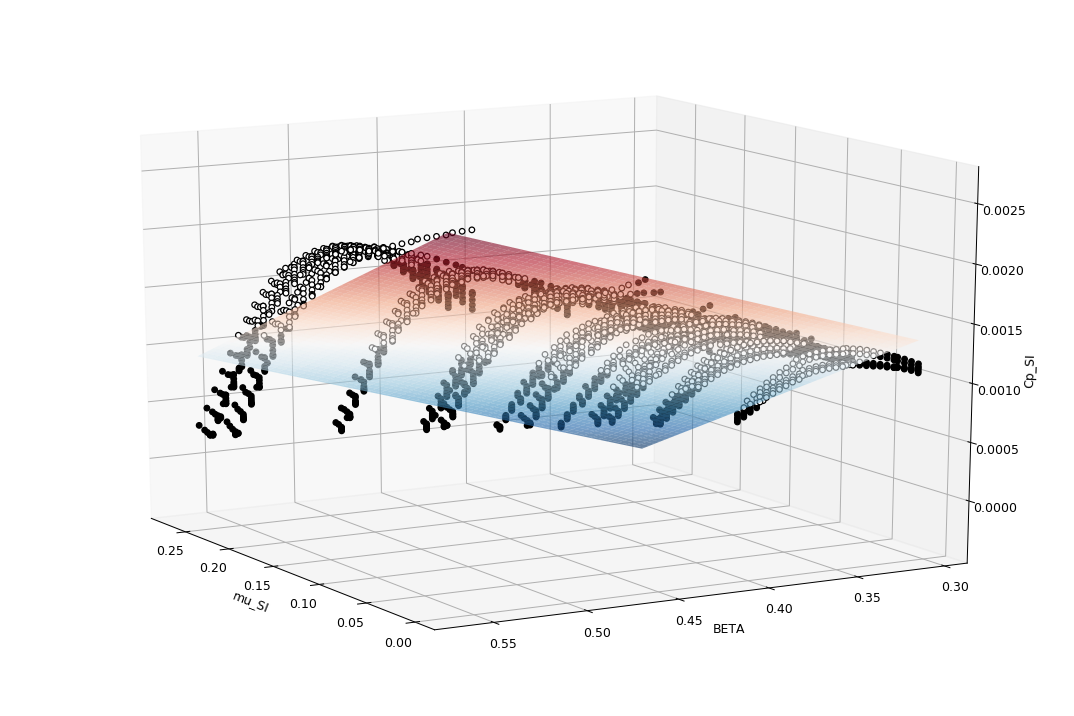

Text(0.5,0,'Cp_SI')

In [163]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

%matplotlib notebook

X = df[['mu_SI', 'BETA']]
y = df['Cp_si']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this

xx1, xx2 = np.meshgrid(np.linspace(X.mu_SI.min(), X.mu_SI.max(), 100), 
                       np.linspace(X.BETA.min(), X.BETA.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-210, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].mu_SI, X[resid >= 0].BETA, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].mu_SI, X[resid < 0].BETA, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('mu_SI')
ax.set_ylabel('BETA')
ax.set_zlabel('Cp_SI')

### $C_{t}=f(\beta,\mu) = constant + a \cdot \beta + b \cdot \mu$

In [164]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA']]
y = df['Ct_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

ct=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ct_si   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 5.209e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:56:12   Log-Likelihood:                 16480.
No. Observations:                2820   AIC:                        -3.295e+04
Df Residuals:                    2817   BIC:                        -3.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039   7.43e-05     52.255      0.000       0.004       0.004
mu_SI         -0.0631      0.000   -311.149      0.000      -0.063      -0.063
BETA           0.0250      0.000    147.044      0.000       0.025       0.025
==============================================================================
Omnibus:                      229.639   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.832
Skew:                          -0.754   Prob(JB):                     5.19e-63
Kurtosis:                       3.410   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


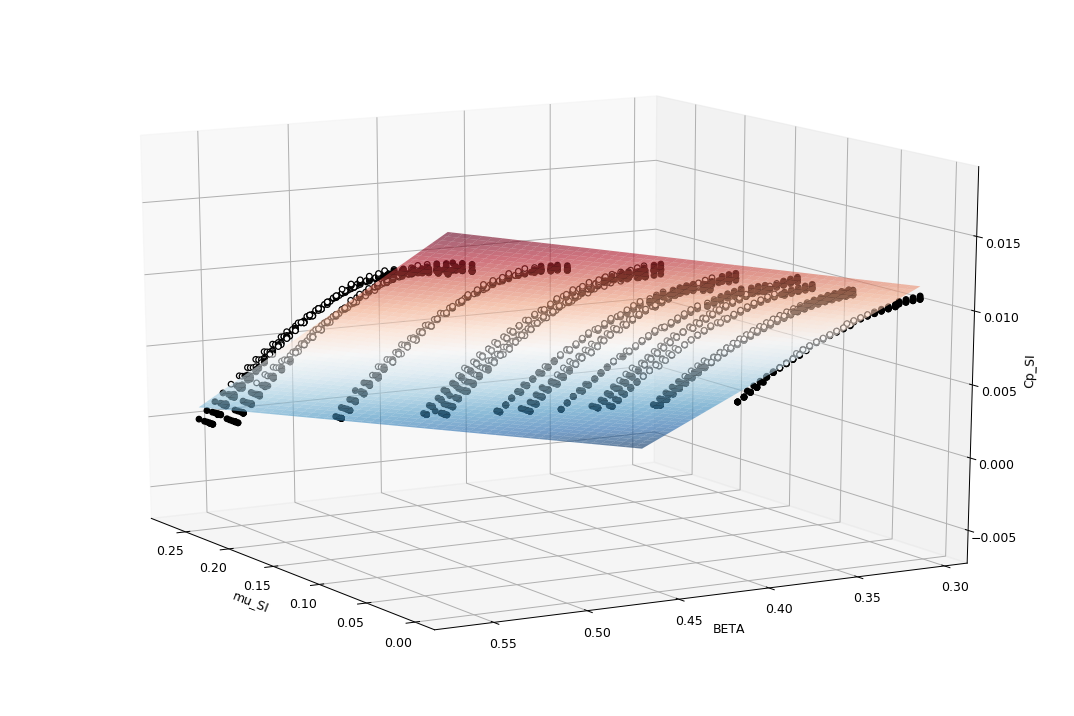

Text(0.5,0,'Cp_SI')

In [152]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

%matplotlib notebook

X = df[['mu_SI', 'BETA']]
y = df['Ct_si']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this

xx1, xx2 = np.meshgrid(np.linspace(X.mu_SI.min(), X.mu_SI.max(), 100), 
                       np.linspace(X.BETA.min(), X.BETA.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-210, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].mu_SI, X[resid >= 0].BETA, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].mu_SI, X[resid < 0].BETA, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('mu_SI')
ax.set_ylabel('BETA')
ax.set_zlabel('Cp_SI')

## 2nd order

### $C_{p}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e\cdot\mu\cdot\beta$

In [153]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE']]
y = df['Cp_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

cp2=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cp_si   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.415e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:06   Log-Likelihood:                 22520.
No. Observations:                2820   AIC:                        -4.503e+04
Df Residuals:                    2814   BIC:                        -4.499e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0005   5.35e-05     -8.777      0.000      -0.001      -0.000
mu_SI             0.0049   9.22e-05     53.438      0.000       0.005       0.005
BETA              0.0046      0.000     18.684      0.000       0.004       0.005
BETA_squared      0.0002      0.000      0.757      0.449      -0.000       0.001
mu_SI_squared    -0.0693      0.001    -75.113      0.000      -0.071      -0.067
mu_ANGLE          0.0420      0.001     28.926      0.000       0.039       0.045
==============================================================================
Omnibus:                       74.729   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           0.367   Prob(JB):                     5.96e-19
Kurtosis:                       3.418   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### $C_{t}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e\cdot\mu\cdot\beta$

In [155]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE']]
y = df['Ct_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

ct2=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ct_si   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.362e+05
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:07   Log-Likelihood:                 19097.
No. Observations:                2820   AIC:                        -3.818e+04
Df Residuals:                    2814   BIC:                        -3.815e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -1.354      0.176      -0.001       0.000
mu_SI            -0.0264      0.000    -84.891      0.000      -0.027      -0.026
BETA              0.0404      0.001     48.575      0.000       0.039       0.042
BETA_squared     -0.0197      0.001    -20.868      0.000      -0.022      -0.018
mu_SI_squared    -0.2900      0.003    -93.422      0.000      -0.296      -0.284
mu_ANGLE          0.2690      0.005     54.991      0.000       0.259       0.279
==============================================================================
Omnibus:                       14.763   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.617
Skew:                          -0.099   Prob(JB):                     0.000149
Kurtosis:                       3.333   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3rd order

### $C_{p}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e\cdot\mu\cdot\beta+ f \cdot \mu^3 + g \cdot \mu^2 \cdot \beta+ h \cdot \mu \cdot \beta^2 + i \cdot \beta^3 $

In [156]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE','BETA_3','mu_3','mu_2_beta','mu_beta_2']]
y = df['Cp_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

cp3=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cp_si   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:07   Log-Likelihood:                 22937.
No. Observations:                2820   AIC:                        -4.585e+04
Df Residuals:                    2810   BIC:                        -4.579e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0021      0.000      7.201      0.000       0.002       0.003
mu_SI            -0.0020      0.000     -7.822      0.000      -0.002      -0.001
BETA             -0.0123      0.002     -5.924      0.000      -0.016      -0.008
BETA_squared      0.0390      0.005      8.134      0.000       0.030       0.048
mu_SI_squared    -0.0092      0.002     -4.206      0.000      -0.014      -0.005
mu_ANGLE      -3672.3040   3971.408     -0.925      0.355   -1.15e+04    4114.866
BETA_3           -0.0306      0.004     -8.408      0.000      -0.038      -0.023
mu_3             -0.0757      0.006    -13.445      0.000      -0.087      -0.065
mu_2_beta      3672.2726   3971.408      0.925      0.355   -4114.897    1.15e+04
mu_beta_2         0.0216      0.001     17.538      0.000       0.019       0.024
==============================================================================
Omnibus:                      436.843   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1023.347
Skew:                           0.880   Prob(JB):                    6.07e-223
Kurtosis:                       5.369   Cond. No.                     4.70e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### $C_{t}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e\cdot\mu\cdot\beta+ f \cdot \mu^3 + g \cdot \mu^2 \cdot \beta+ h \cdot \mu \cdot \beta^2 + i \cdot \beta^3 $

In [157]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE','BETA_3','mu_3','mu_2_beta','mu_beta_2']]
y = df['Ct_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

ct3=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ct_si   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.192e+05
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:08   Log-Likelihood:                 19737.
No. Observations:                2820   AIC:                        -3.945e+04
Df Residuals:                    2810   BIC:                        -3.939e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0110      0.001     12.117      0.000       0.009       0.013
mu_SI            -0.0470      0.001    -60.002      0.000      -0.049      -0.045
BETA             -0.0356      0.006     -5.527      0.000      -0.048      -0.023
BETA_squared      0.1567      0.015     10.501      0.000       0.127       0.186
mu_SI_squared    -0.1265      0.007    -18.534      0.000      -0.140      -0.113
mu_ANGLE      -3.517e+04   1.24e+04     -2.847      0.004   -5.94e+04   -1.09e+04
BETA_3           -0.1417      0.011    -12.504      0.000      -0.164      -0.119
mu_3              0.3597      0.018     20.527      0.000       0.325       0.394
mu_2_beta      3.517e+04   1.24e+04      2.847      0.004    1.09e+04    5.94e+04
mu_beta_2         0.1462      0.004     38.203      0.000       0.139       0.154
==============================================================================
Omnibus:                      126.770   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.921
Skew:                           0.340   Prob(JB):                     9.72e-52
Kurtosis:                       4.239   Cond. No.                     4.70e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 4th order

### $C_{p}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e \cdot \mu \cdot + f \cdot \beta+ g \cdot \mu^3 + h\cdot \mu^2 \cdot \beta+ i \cdot \mu \cdot \beta^2 + j \cdot \beta^3+ k \cdot \mu^4+ l \cdot \beta^4+ m \cdot \mu^3 \cdot \beta + n \cdot \mu^2 \cdot \beta^2 + o \cdot \mu \cdot \beta^3  $

In [158]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE','BETA_3','mu_3','mu_2_beta','mu_beta_2','mu_4','beta_4','mu_3_beta','mu_2_beta_2','mu_beta_3']]
y = df['Cp_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

cp4=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cp_si   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:08   Log-Likelihood:                 23022.
No. Observations:                2820   AIC:                        -4.601e+04
Df Residuals:                    2805   BIC:                        -4.592e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0060      0.002     -3.403      0.001      -0.009      -0.003
mu_SI         -7.979e-05      0.001     -0.074      0.941      -0.002       0.002
BETA              0.0653      0.017      3.842      0.000       0.032       0.099
BETA_squared     -0.2390      0.061     -3.947      0.000      -0.358      -0.120
mu_SI_squared     0.0006      0.014      0.040      0.968      -0.028       0.029
mu_ANGLE      -7258.8363   3896.271     -1.863      0.063   -1.49e+04     381.011
BETA_3            0.4128      0.095      4.360      0.000       0.227       0.598
mu_3             -0.2588      0.040     -6.519      0.000      -0.337      -0.181
mu_2_beta      7258.8942   3896.273      1.863      0.063    -380.958    1.49e+04
mu_beta_2        -0.0331      0.016     -2.094      0.036      -0.064      -0.002
mu_4              0.6905      0.089      7.797      0.000       0.517       0.864
beta_4           -0.2642      0.055     -4.819      0.000      -0.372      -0.157
mu_3_beta        -0.2961      0.098     -3.028      0.002      -0.488      -0.104
mu_2_beta_2      -0.0152      0.078     -0.196      0.844      -0.168       0.137
mu_beta_3         0.0718      0.023      3.083      0.002       0.026       0.118
==============================================================================
Omnibus:                      434.790   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.165
Skew:                           0.890   Prob(JB):                    2.38e-213
Kurtosis:                       5.273   Cond. No.                     4.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### $C_{t}=f(\beta,\mu)=constant + a \cdot \beta + b \cdot \mu + c\cdot \beta^2 + d\cdot\mu^2 + e \cdot \mu \cdot + f \cdot \beta+ g \cdot \mu^3 + h\cdot \mu^2 \cdot \beta+ i \cdot \mu \cdot \beta^2 + j \cdot \beta^3+ k \cdot \mu^4+ l \cdot \beta^4+ m \cdot \mu^3 \cdot \beta + n \cdot \mu^2 \cdot \beta^2 + o \cdot \mu \cdot \beta^3  $

In [159]:
import statsmodels.api as sm
X = df[['mu_SI', 'BETA','BETA_squared','mu_SI_squared','mu_ANGLE','BETA_3','mu_3','mu_2_beta','mu_beta_2','mu_4','beta_4','mu_3_beta','mu_2_beta_2','mu_beta_3']]
y = df['Ct_si']

## fit a OLS model 
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

ct4=est.rsquared
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ct_si   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.321e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:54:09   Log-Likelihood:                 19856.
No. Observations:                2820   AIC:                        -3.968e+04
Df Residuals:                    2805   BIC:                        -3.959e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0221      0.005     -4.068      0.000      -0.033      -0.011
mu_SI            -0.0413      0.003    -12.472      0.000      -0.048      -0.035
BETA              0.2806      0.052      5.373      0.000       0.178       0.383
BETA_squared     -0.9768      0.186     -5.248      0.000      -1.342      -0.612
mu_SI_squared    -0.0503      0.044     -1.141      0.254      -0.137       0.036
mu_ANGLE       -4.39e+04    1.2e+04     -3.666      0.000   -6.74e+04   -2.04e+04
BETA_3            1.6652      0.291      5.722      0.000       1.095       2.236
mu_3             -0.3085      0.122     -2.528      0.012      -0.548      -0.069
mu_2_beta       4.39e+04    1.2e+04      3.666      0.000    2.04e+04    6.74e+04
mu_beta_2        -0.0484      0.049     -0.996      0.319      -0.144       0.047
mu_4              1.0703      0.272      3.932      0.000       0.537       1.604
beta_4           -1.0774      0.168     -6.395      0.000      -1.408      -0.747
mu_3_beta         0.3056      0.301      1.017      0.309      -0.284       0.895
mu_2_beta_2      -0.3406      0.239     -1.426      0.154      -0.809       0.128
mu_beta_3         0.3048      0.072      4.257      0.000       0.164       0.445
==============================================================================
Omnibus:                      114.934   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.456
Skew:                           0.251   Prob(JB):                     9.18e-56
Kurtosis:                       4.380   Cond. No.                     4.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Results

In [165]:
print("* Value of R-Squared:")
print("     1 Degree: ")
print("           C_T = f(mu,beta) ==> %.4f"% ct)
print("           C_P = f(mu,beta) ==> %.4f"% cp)
print("     2 Degree ")
print("           C_T = f(mu,beta) ==> %.4f"% ct2)
print("           C_P = f(mu,beta) ==> %.4f"% cp2)
print("     3 Degree: ")
print("           C_T = f(mu,beta) ==> %.4f"% ct3)
print("           C_P = f(mu,beta) ==> %.4f"% cp3)
print("     4 Degree: ")
print("           C_T = f(mu,beta) ==> %.4f"% ct4)
print("           C_P = f(mu,beta) ==> %.4f"% cp4)


* Value of R-Squared:
     1 Degree: 
           C_T = f(mu,beta) ==> 0.9737
           C_P = f(mu,beta) ==> 0.8463
     2 Degree 
           C_T = f(mu,beta) ==> 0.9959
           C_P = f(mu,beta) ==> 0.9772
     3 Degree: 
           C_T = f(mu,beta) ==> 0.9974
           C_P = f(mu,beta) ==> 0.9831
     4 Degree: 
           C_T = f(mu,beta) ==> 0.9976
           C_P = f(mu,beta) ==> 0.9841
